<a href="https://colab.research.google.com/github/Daria-Lytvynenko/ML_course/blob/main/HW_2_2_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BB%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [1]:
import numpy as np

In [2]:
def sigmoid(z):
  x=1/(1+np.e**(-z))
  return x

In [3]:
z=[-2,-1,0,1,2]
sigmoids=[sigmoid(i) for i in z]

In [4]:
sigmoids

[0.11920292202211757,
 0.2689414213699951,
 0.5,
 0.7310585786300049,
 0.8807970779778823]



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [32]:
theta=np.array([[0.5, -0.5]])
X=np.array([[1,2],[1,-1],[1, 0],[1,1]])

In [33]:
theta.shape

(1, 2)

In [29]:
theta=np.expand_dims(theta, axis=1)

In [34]:
def hypothesis(theta, X):
  h=1/(1+np.e**(np.dot(X,-theta.T)))
  return h

In [35]:
hypothesis(theta, X)

array([[0.37754067],
       [0.73105858],
       [0.62245933],
       [0.5       ]])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [52]:
y=np.expand_dims([1,0,1,0], axis=1)
def compute_gradient(theta,X,y):
  n=len(y)
  gradient=(1/n)*(np.dot(X.T, hypothesis(theta, X)-y))
  return gradient

In [53]:
compute_gradient(theta, X,y)

array([[ 0.05776464],
       [-0.36899431]])


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [ ]:
np.array([[0,0]])

In [71]:
compute_gradient(theta,X,y).shape

(2, 1)

In [81]:
def full_batch_gradient_descent(X,y, lr=0.1, epochs=1000):
  theta_j=np.array([[0,0]])
  ers=[]
  n=len(y)
  for i in range(epochs):
    err=hypothesis(theta_j,X)-y
    ers.append(sum(err**2))
    theta_j=theta_j-lr*compute_gradient(theta_j, X,y).T
  return theta_j, ers


In [82]:
theta_j, ers=full_batch_gradient_descent(X,y,lr=0.1,epochs=1000)

In [68]:
from matplotlib import pyplot as plt

In [83]:
theta_j

array([[-0.45409043,  0.90818301]])

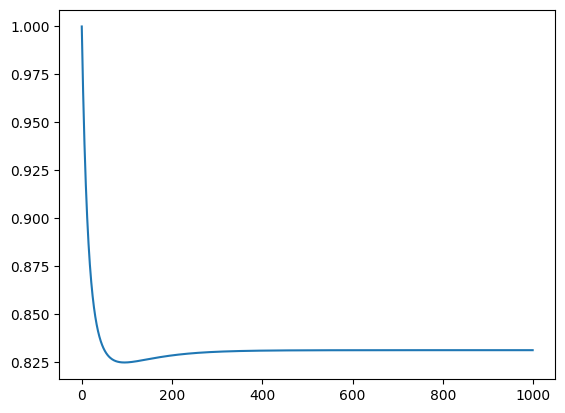

In [84]:
plt.plot(ers)

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [85]:
hypothesis(theta_j, X)

array([[0.79612929],
       [0.20387106],
       [0.38838867],
       [0.61161184]])

In [86]:
def predict(theta, X, treshold=0.5):
  predict_proba=hypothesis(theta,X)
  prediction=np.where(predict_proba>treshold, 1,0)
  return prediction

In [87]:
predict(theta_j, X, treshold=0.5)

array([[1],
       [0],
       [0],
       [1]])